### 1. Load the dataset into python environment

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
titanic=pd.read_csv(r"C:\Users\hp\Downloads\titanic_dataset.csv")
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### 2. Make ‘PassengerId’ as the index column

In [3]:
titanic.set_index('PassengerId',inplace=True)


In [4]:
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 3. Check the basic details of the dataset

In [5]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [6]:
titanic.shape

(891, 11)

In [7]:
titanic.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
titanic.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

### Inference:
    There are null values in the dataset.

In [9]:
titanic.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### 4. Fill in all the missing values present in all the columns in the dataset

In [16]:
titanic['Age'].isnull().sum() # gives the number of null values

177

In [17]:
age=titanic['Age'].mean()

In [18]:
# The null values in Age are filled using mean.
titanic['Age']=titanic['Age'].fillna(age) 

In [19]:
titanic['Cabin'].isnull().sum()

687

### Inference
#### Since there are 687 null values out of total 891 values we can drop the column Cabin from the dataframe.

In [20]:
titanic.drop('Cabin',axis=1,inplace=True)

In [21]:
titanic

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S


In [22]:
titanic['Embarked'].isnull().sum() # gives number of null values

2

In [23]:
x=titanic['Embarked'].mode()[0]
x # gives mode

'S'

In [24]:
titanic['Embarked']=titanic['Embarked'].fillna(x) # null values are filled using mode 'S'

In [25]:
titanic.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

### Inference:
All the null values are filled

### 5. Check and handle outliers in at least 3 columns in the dataset.

<AxesSubplot:>

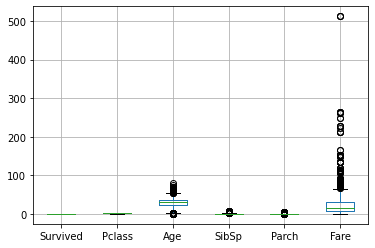

In [41]:
titanic.boxplot() # shows the columns with outlier

{'whiskers': [<matplotlib.lines.Line2D at 0x199aaddb670>,
 'caps': [<matplotlib.lines.Line2D at 0x199aaddbd30>,
 'boxes': [<matplotlib.lines.Line2D at 0x199aaddb310>],
 'medians': [<matplotlib.lines.Line2D at 0x199aade6430>],
 'fliers': [<matplotlib.lines.Line2D at 0x199aade6790>],
 'means': []}

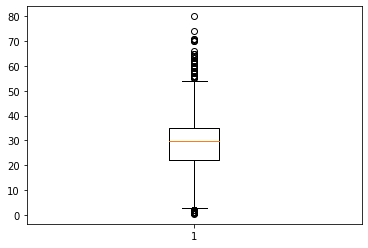

In [27]:
plt.boxplot(titanic['Age'])

In [28]:
titanic['Age'].describe()

count    891.000000
mean      29.699118
std       13.002015
min        0.420000
25%       22.000000
50%       29.699118
75%       35.000000
max       80.000000
Name: Age, dtype: float64

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

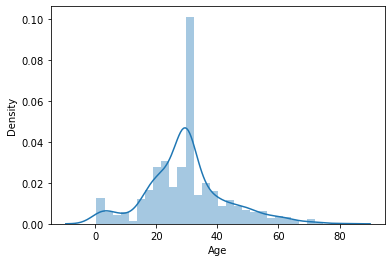

In [29]:
sns.distplot(titanic['Age'])

In [30]:
q1=np.percentile(titanic['Age'],25)
q3=np.percentile(titanic['Age'],75)
IQR=q3-q1
outlier=(titanic['Age']<(q1-1.5*IQR)) | (titanic['Age']>(q3+1.5*IQR))
Age_outlier=titanic[outlier]
Age_outlier

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
8,0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,21.0750,S
12,1,1,"Bonnell, Miss. Elizabeth",female,58.00,0,0,113783,26.5500,S
16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.00,0,0,248706,16.0000,S
17,0,3,"Rice, Master. Eugene",male,2.00,4,1,382652,29.1250,Q
34,0,2,"Wheadon, Mr. Edward H",male,66.00,0,0,C.A. 24579,10.5000,S
...,...,...,...,...,...,...,...,...,...,...
828,1,2,"Mallet, Master. Andre",male,1.00,0,2,S.C./PARIS 2079,37.0042,C
830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.00,0,0,113572,80.0000,S
832,1,2,"Richards, Master. George Sibley",male,0.83,1,1,29106,18.7500,S


In [31]:
Age_outlier['Age'].values

array([ 2.  , 58.  , 55.  ,  2.  , 66.  , 65.  ,  0.83, 59.  , 71.  ,
       70.5 ,  2.  , 55.5 ,  1.  , 61.  ,  1.  , 56.  ,  1.  , 58.  ,
        2.  , 59.  , 62.  , 58.  , 63.  , 65.  ,  2.  ,  0.92, 61.  ,
        2.  , 60.  ,  1.  ,  1.  , 64.  , 65.  , 56.  ,  0.75,  2.  ,
       63.  , 58.  , 55.  , 71.  ,  2.  , 64.  , 62.  , 62.  , 60.  ,
       61.  , 57.  , 80.  ,  2.  ,  0.75, 56.  , 58.  , 70.  , 60.  ,
       60.  , 70.  ,  0.67, 57.  ,  1.  ,  0.42,  2.  ,  1.  , 62.  ,
        0.83, 74.  , 56.  ])

### Inference:
#### Since ages detected as outliers lie within the reasonable range of 0 to 80, they need not be treated as outliers.